In [1]:
import json
import zlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from analysis_funcs import run_analysis, cluster_similarity, stringify_test_cases, stringify_test_titles, calculate_pairwise_ncd, plot_heatmaps, list_clusters, true_clusters, kmeans_clustering

In [2]:
jekyll_data_file = './data/jekyll/jekyll_parsed_steps.json'
keygen_data_file = './data/keygen-api/keygen-api_parsed_steps.json'
trema_data_file = './data/trema/trema_parsed_steps.json'
hub_data_file = './data/hub/hub_parsed_steps.json'
aws_sdk_ruby_file = './data/aws-sdk-ruby/aws-sdk-ruby_parsed_steps.json'

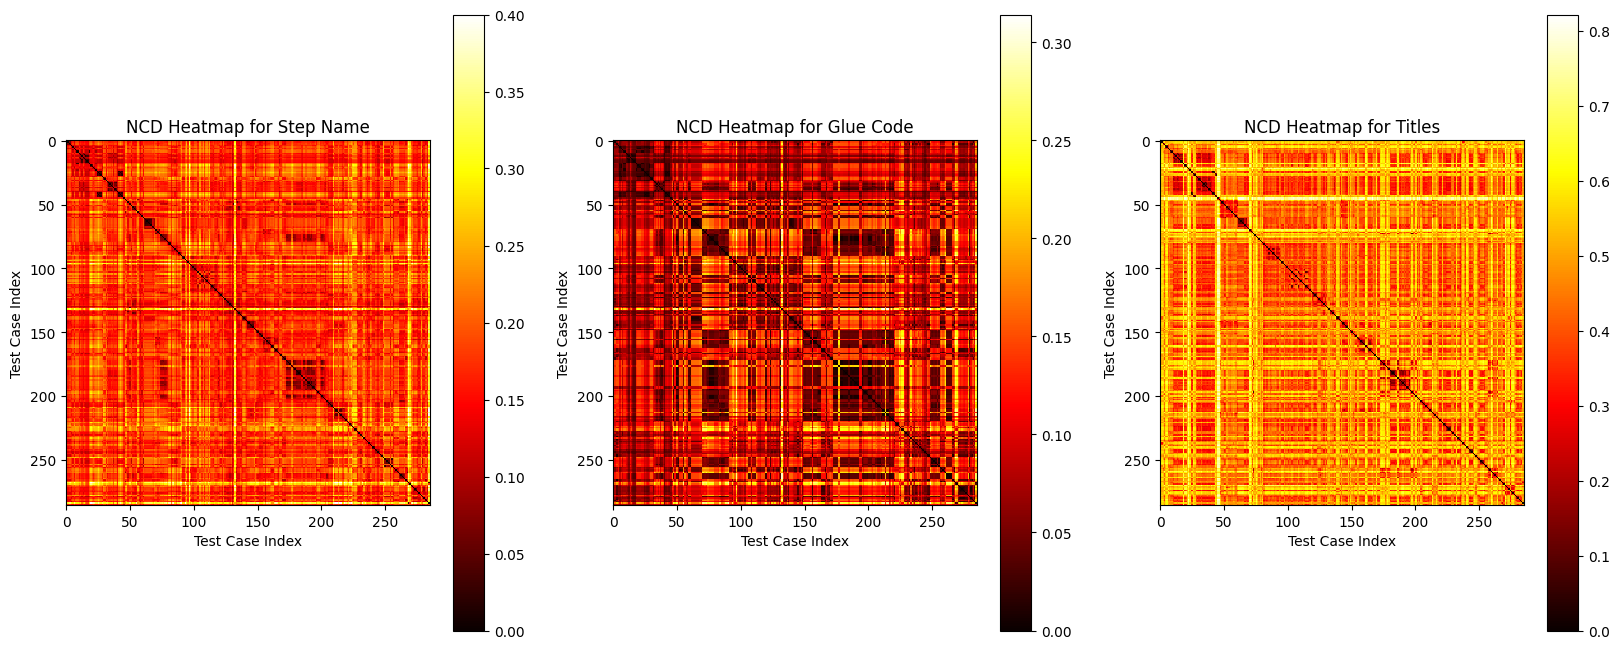

Step Name Precision:  0.04195804195804196
Step Name Recall:  0.04195804195804196
Step Name F1 score:  0.04195804195804196
Step Definition Precision:  0.02097902097902098
Step Definition Recall:  0.02097902097902098
Step Definition F1 score 0.02097902097902098
Scenario Precision:  0.01048951048951049
Scenario Recall:  0.01048951048951049
Scenario F1 score 0.01048951048951049


In [14]:
run_analysis(jekyll_data_file)

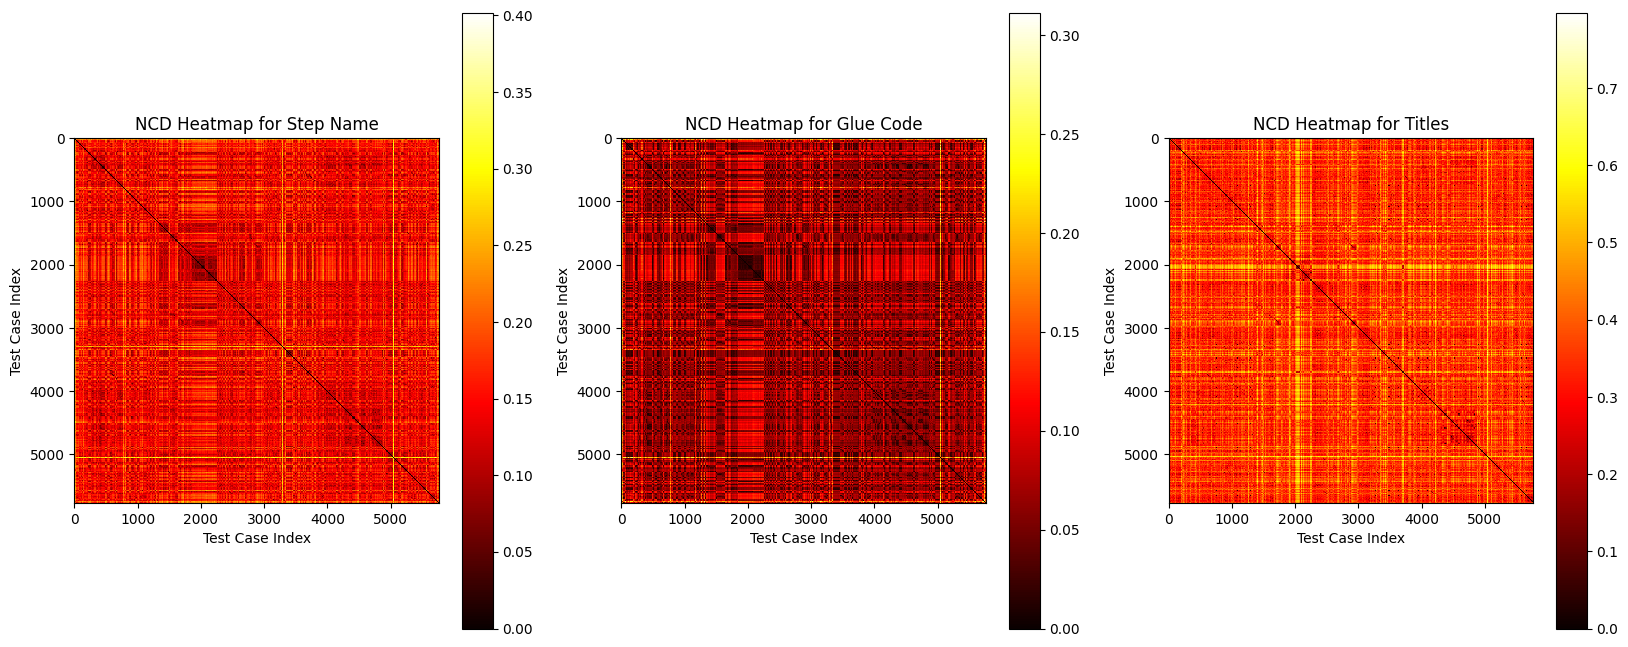

Step Name Precision:  0.008670019074041963
Step Name Recall:  0.008670019074041963
Step Name F1 score:  0.008670019074041963
Step Definition Precision:  0.007976417548118606
Step Definition Recall:  0.007976417548118606
Step Definition F1 score 0.007976417548118606
Scenario Precision:  0.009710421362926998
Scenario Recall:  0.009710421362926998
Scenario F1 score 0.009710421362926998


In [16]:
run_analysis(keygen_data_file)

In [17]:
run_analysis(trema_data_file)

NameError: name 'trema_data_file' is not defined

In [ ]:
run_analysis(hub_data_file)

In [ ]:
run_analysis(aws_sdk_ruby_file)